In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime, timedelta
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.optimize import minimize
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import sys
import os

# For portfolio optimization
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns, EfficientFrontier

import warnings
warnings.filterwarnings('ignore')

In [12]:
# Append the project root path to sys.path
sys.path.append(os.path.abspath(".."))

In [2]:
# Define the assets we'll analyze
assets = ['TSLA', 'BND', 'SPY']

# Define the time period
end_date = "2025-01-31"
start_date = "2015-01-01"


# Fetch the data
data = yf.download(assets, start=start_date, end=end_date)
print("\nData shape:", data.shape)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


Data shape: (2535, 15)


In [6]:
# Extract just the Adjusted Close prices for simplicity
prices = data['Close'].copy()
returns = prices.pct_change().dropna()

In [14]:
# Now import the modules
from scripts.time_series_forcasting import TimeSeriesForecaster


ADF Statistic: -0.5687
p-value: 0.8779
Critical Values:
	1%: -3.4330
	5%: -2.8627
	10%: -2.5674
Result: The series is non-stationary (fail to reject H0)
ADF Statistic: -34.5975
p-value: 0.0000
Critical Values:
	1%: -3.4329
	5%: -2.8627
	10%: -2.5674
Result: The series is stationary (reject H0)


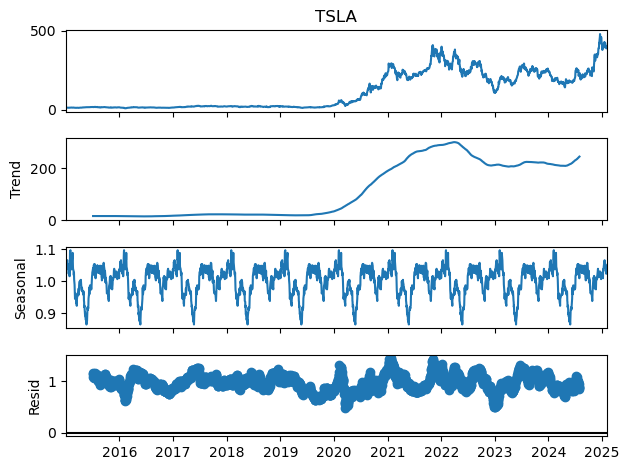

                               SARIMAX Results                                
Dep. Variable:                   TSLA   No. Observations:                 2280
Model:                 ARIMA(2, 1, 1)   Log Likelihood                4369.120
Date:                Sun, 09 Mar 2025   AIC                          -8730.241
Time:                        12:39:05   BIC                          -8707.315
Sample:                             0   HQIC                         -8721.878
                               - 2280                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0056      0.015     -0.366      0.714      -0.036       0.025
ar.L2          0.0305      0.015      2.024      0.043       0.001       0.060
ma.L1         -0.9962      0.002   -650.386      0.0

In [ ]:
##Time series analysis and forcasting for 'TSLA'

# Initialize the forecaster
forecast_asset = 'TSLA'  # Change to any asset name in your dataset
forecaster = TimeSeriesForecaster(forecast_asset, prices, returns)

# Check stationarity
forecaster.check_stationarity(forecaster.prices)
forecaster.check_stationarity(forecaster.returns)

# Decompose the series
forecaster.decompose_series()

# Fit ARIMA model (choose your p, d, q)
p, d, q = 2, 1, 1  # Change these values as needed
forecaster.fit_arima(p, d, q)



Model Evaluation on Test Data:
Mean Absolute Error (MAE): 0.028948
Root Mean Squared Error (RMSE): 0.040050


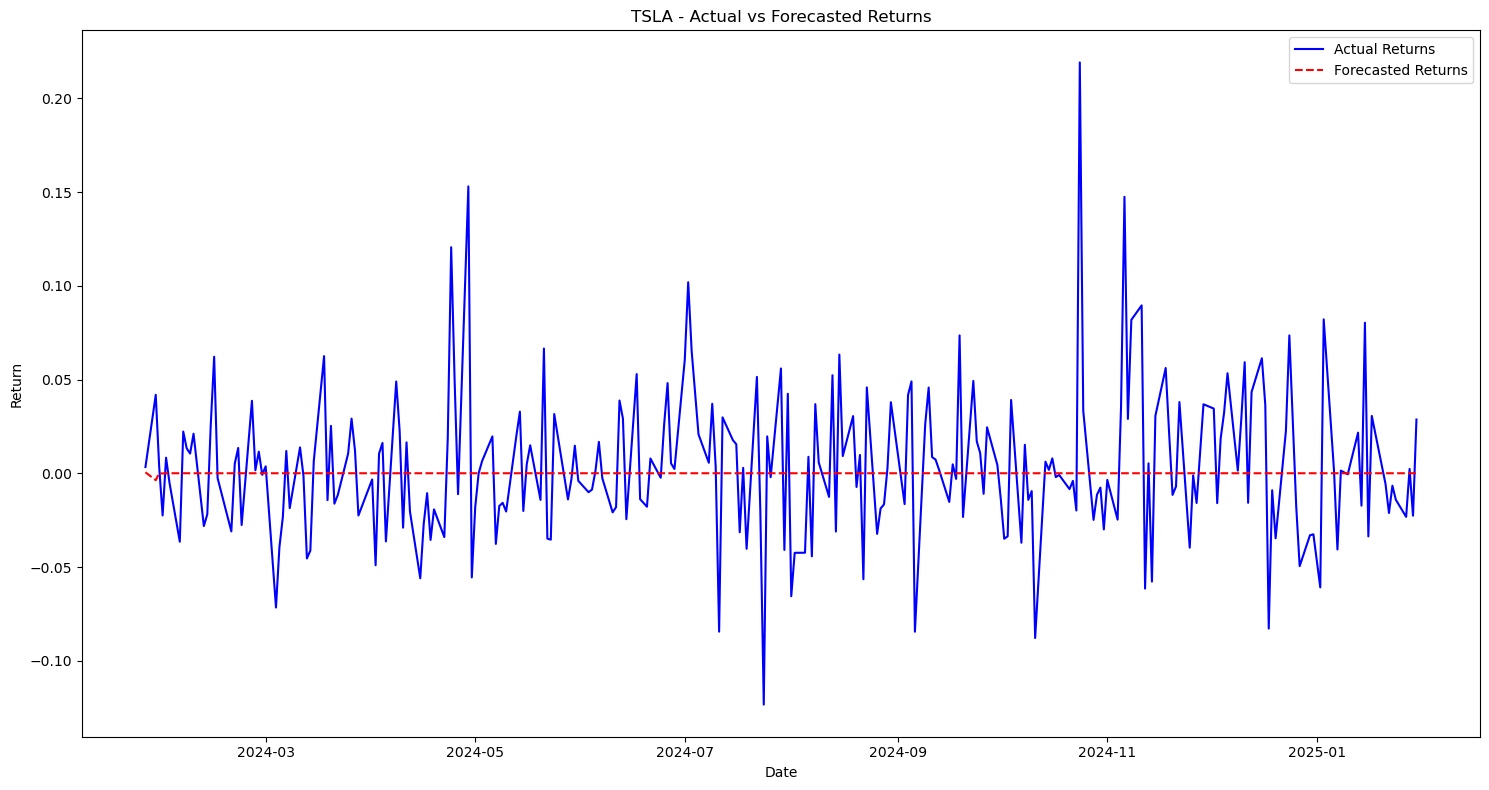

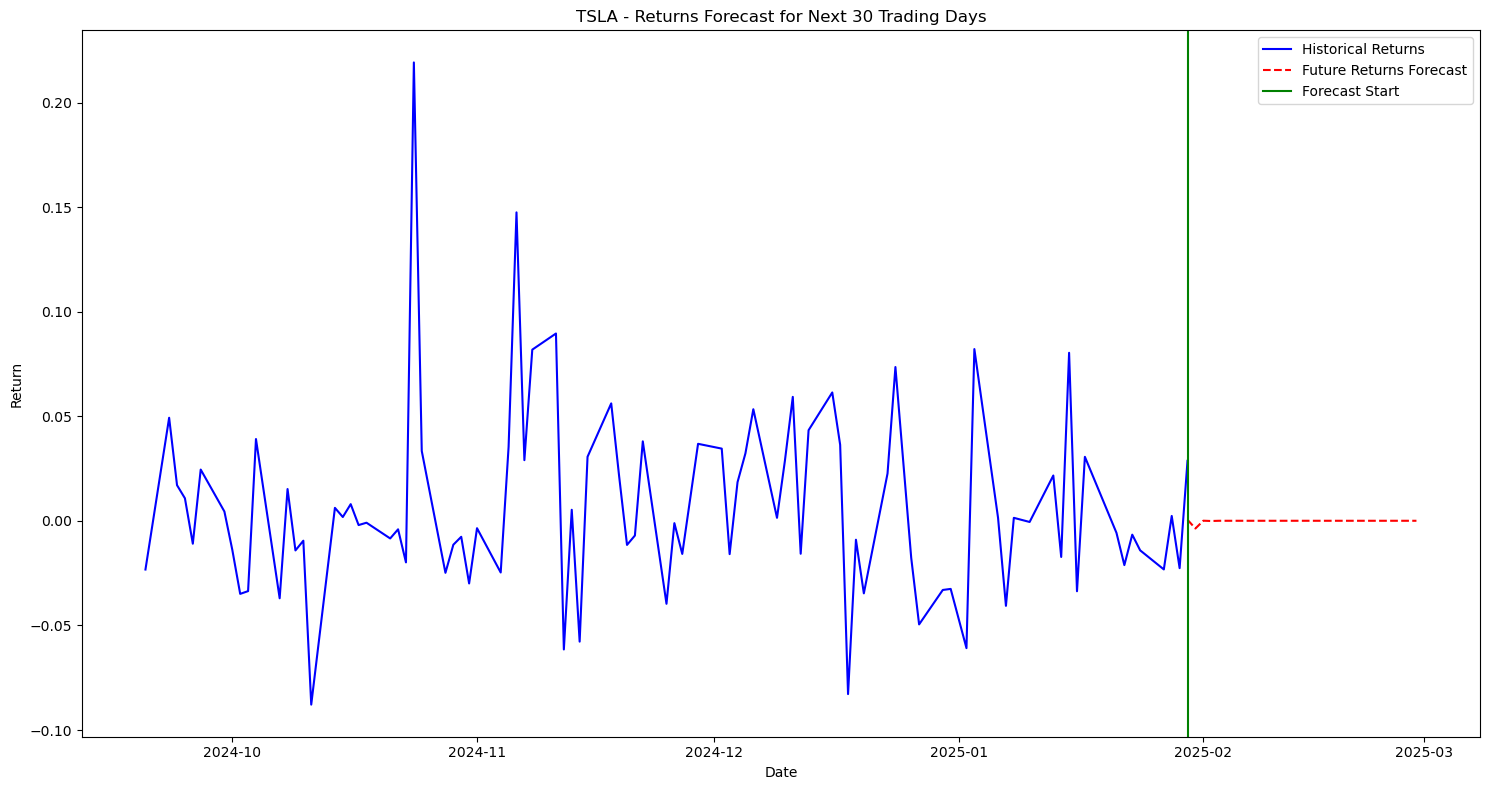

In [16]:
##Forcasting for 'TSLA'
# Forecast and evaluate
forecaster.forecast_and_evaluate()

# Generate future forecasts
forecaster.future_forecast(future_steps=30)

ADF Statistic: -1.4723
p-value: 0.5472
Critical Values:
	1%: -3.4330
	5%: -2.8627
	10%: -2.5674
Result: The series is non-stationary (fail to reject H0)
ADF Statistic: -9.9810
p-value: 0.0000
Critical Values:
	1%: -3.4330
	5%: -2.8627
	10%: -2.5674
Result: The series is stationary (reject H0)


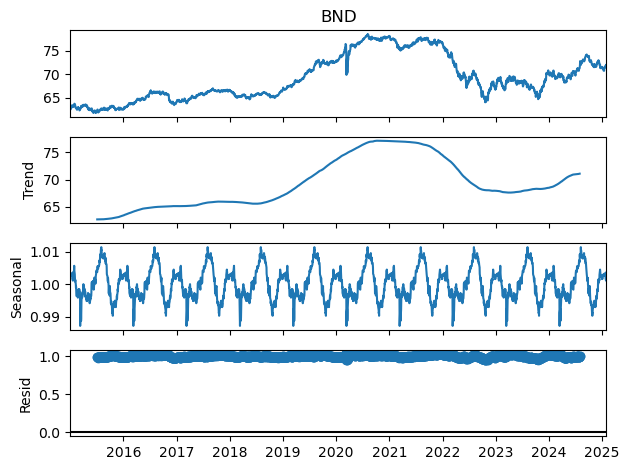

                               SARIMAX Results                                
Dep. Variable:                    BND   No. Observations:                 2280
Model:                 ARIMA(1, 0, 1)   Log Likelihood                9704.928
Date:                Sun, 09 Mar 2025   AIC                         -19401.857
Time:                        12:45:14   BIC                         -19378.929
Sample:                             0   HQIC                        -19393.494
                               - 2280                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.502e-05   7.75e-05      0.710      0.478   -9.69e-05       0.000
ar.L1          0.5830      0.303      1.927      0.054      -0.010       1.176
ma.L1         -0.5997      0.301     -1.991      0.0

In [18]:
##Time series analysis and forcasting for 'BND'

# Initialize the forecaster
forecast_asset = 'BND'  # Change to any asset name in your dataset
forecaster = TimeSeriesForecaster(forecast_asset, prices, returns)

# Check stationarity
forecaster.check_stationarity(forecaster.prices)
forecaster.check_stationarity(forecaster.returns)

# Decompose the series
forecaster.decompose_series()

# Fit ARIMA model (choose your p, d, q)
p, d, q = 1, 0, 1  # Change these values as needed
forecaster.fit_arima(p, d, q)



Model Evaluation on Test Data:
Mean Absolute Error (MAE): 0.002655
Root Mean Squared Error (RMSE): 0.003372


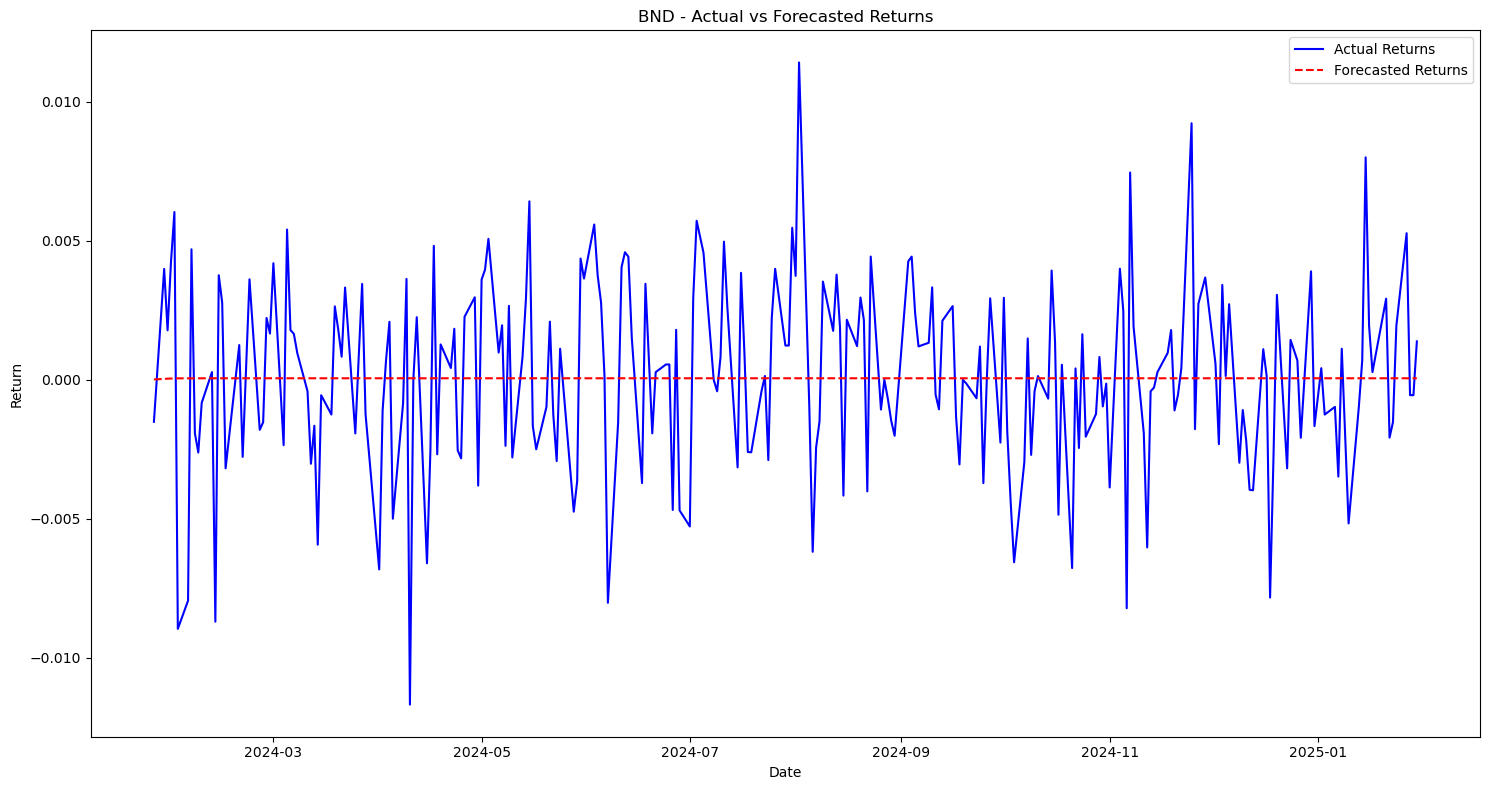

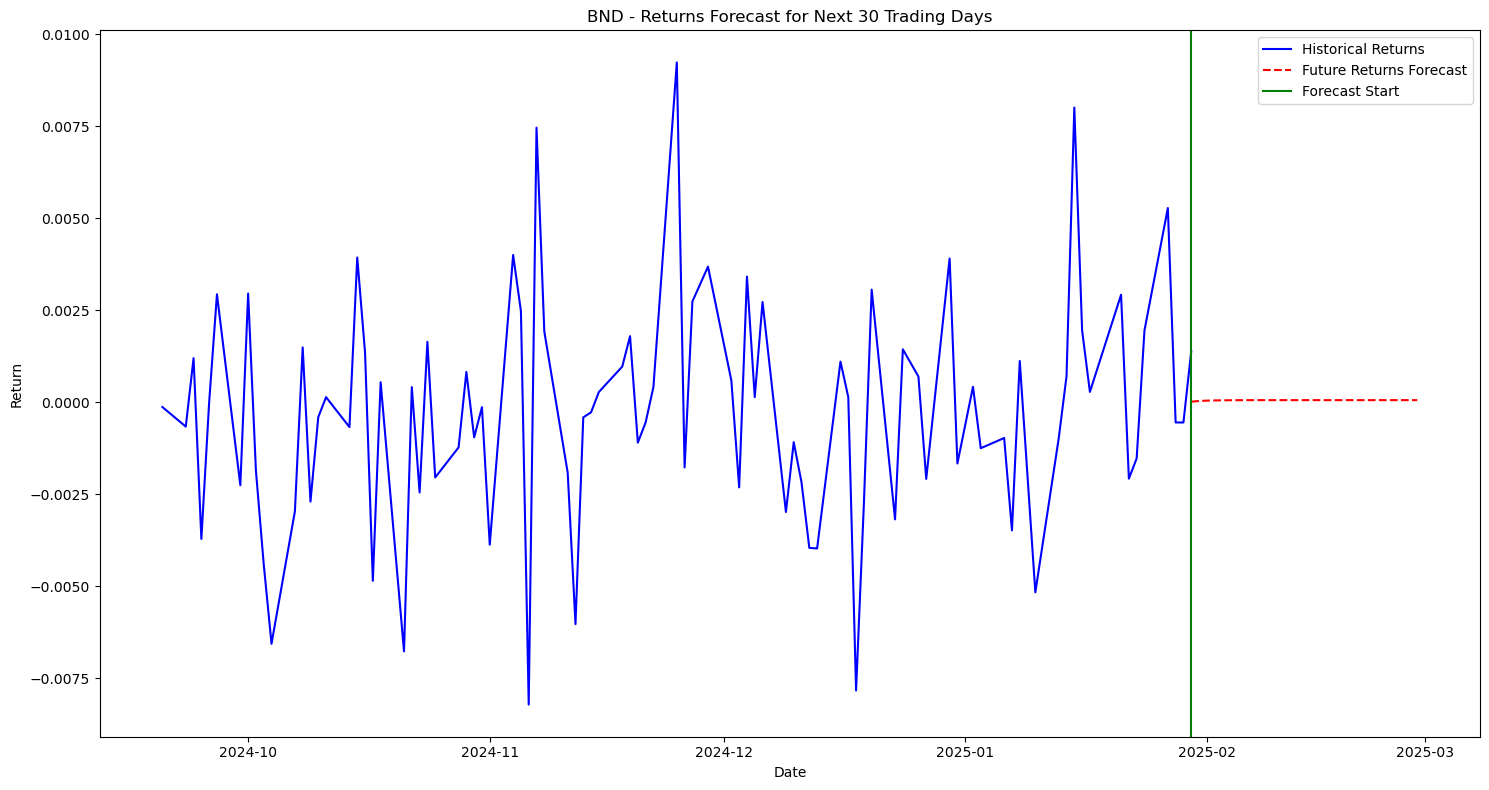

In [19]:
##Forcasting for 'BND'
# Forecast and evaluate
forecaster.forecast_and_evaluate()

# Generate future forecasts
forecaster.future_forecast(future_steps=30)

ADF Statistic: 0.9362
p-value: 0.9935
Critical Values:
	1%: -3.4329
	5%: -2.8627
	10%: -2.5674
Result: The series is non-stationary (fail to reject H0)
ADF Statistic: -15.9593
p-value: 0.0000
Critical Values:
	1%: -3.4329
	5%: -2.8627
	10%: -2.5674
Result: The series is stationary (reject H0)


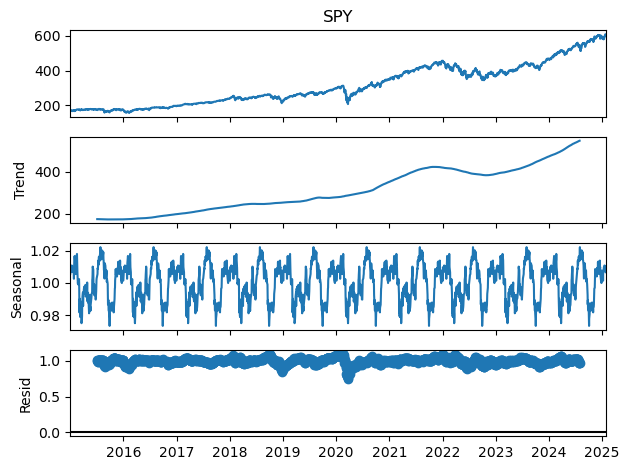

                               SARIMAX Results                                
Dep. Variable:                    SPY   No. Observations:                 2280
Model:                 ARIMA(2, 1, 1)   Log Likelihood                6985.710
Date:                Sun, 09 Mar 2025   AIC                         -13963.419
Time:                        12:45:28   BIC                         -13940.493
Sample:                             0   HQIC                        -13955.057
                               - 2280                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1200      0.009    -13.249      0.000      -0.138      -0.102
ar.L2          0.0514      0.008      6.105      0.000       0.035       0.068
ma.L1         -0.9992      0.007   -142.091      0.0

In [20]:
##Time series analysis and forcasting for 'SPY'

# Initialize the forecaster
forecast_asset = 'SPY'  # Change to any asset name in your dataset
forecaster = TimeSeriesForecaster(forecast_asset, prices, returns)

# Check stationarity
forecaster.check_stationarity(forecaster.prices)
forecaster.check_stationarity(forecaster.returns)

# Decompose the series
forecaster.decompose_series()

# Fit ARIMA model (choose your p, d, q)
p, d, q = 2, 1, 1 # Change these values as needed
forecaster.fit_arima(p, d, q)


Model Evaluation on Test Data:
Mean Absolute Error (MAE): 0.005968
Root Mean Squared Error (RMSE): 0.008073


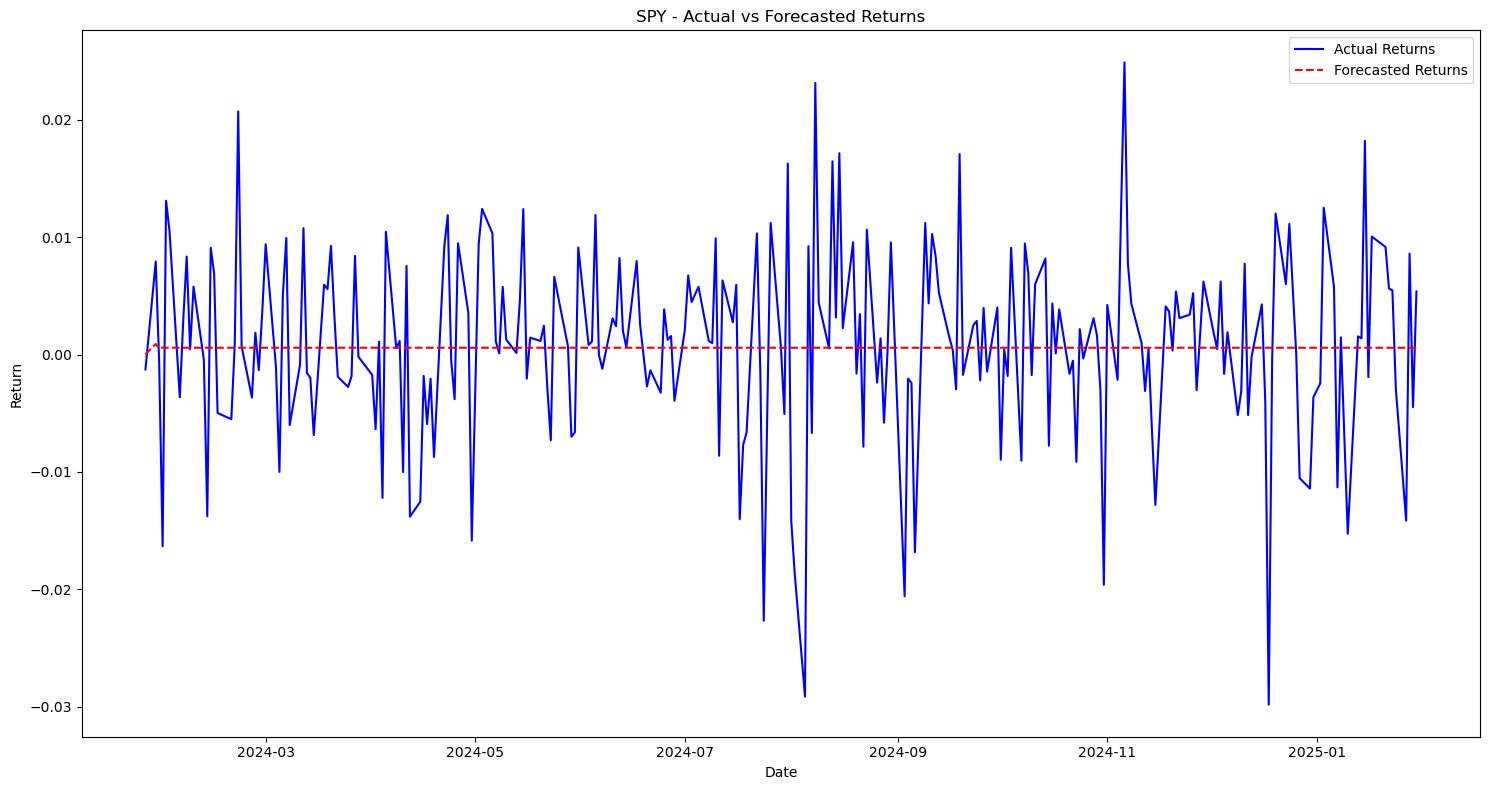

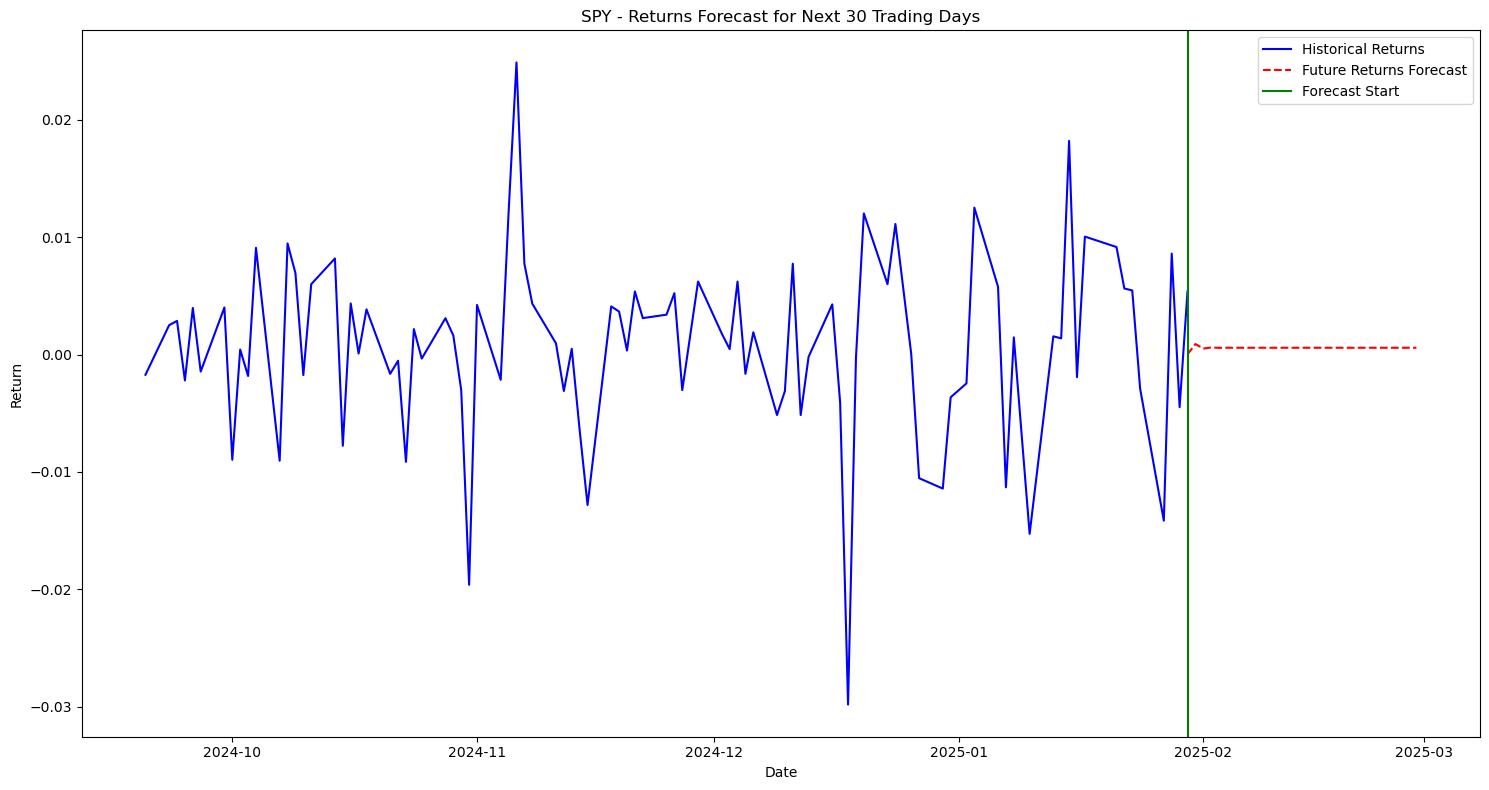

In [21]:
##Forcasting for 'SPY'
# Forecast and evaluate
forecaster.forecast_and_evaluate()

# Generate future forecasts
forecaster.future_forecast(future_steps=30)